In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
snelldata = np.genfromtxt('snell.csv', delimiter = ',', skip_header = 1)

In [17]:
snelldata = np.deg2rad(snelldata)

In [28]:
y = np.sin(snelldata[:, 0]) # incidente
x = np.sin(snelldata[:, 1]) # refractado

In [41]:
m = np.linalg.lstsq(x[:, np.newaxis], y)[0]

yy = m*x
n = len(x)

ye = ((y - yy)**2).sum()
xe = ((x - x.mean())**2).sum()

dm = np.sqrt(ye/((n-2)*xe))

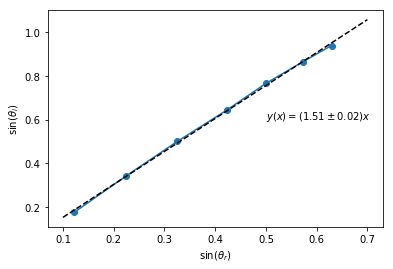

In [46]:
plt.plot(x, y, '-o')

xx = np.linspace(0.1, 0.7, 10)
plt.plot(xx, m*xx, "--", c='k')
plt.text(0.5, 0.6, r"$y(x) = (%.2f \pm %.2f)x$"%(m, dm))

plt.xlabel(r'$\sin(\theta_r)$')
plt.ylabel(r'$\sin(\theta_i)$')

plt.savefig('indice.pdf')
plt.show()